# What this is

- This serves as a notebook where we illustrate all the functionalities of the `PyUncertainNumber` package.
- It is aimed to show to others
- This will be a list features for reference and it will be a concise document (this is not a documentation or a tutorial).
-  


In [1]:
from PyUncertainNumber.UC.uncertainNumber import UncertainNumber as UN
from PyUncertainNumber.UC.utils import UNEncoder, cd_root_dir
import dataclasses, json

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext rich

In [3]:
from rich import print as rprint

In [4]:
cd_root_dir(depth=1)

current directory: /Users/lesliec/Documents/Github_repos/PyUncertainNumber


# ~~UC: Uncertainty characterisation~~

- with a dummy example of elastic modulus

### minimal speficication

In [ ]:
un_obj = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa')

In [ ]:
# the verbose user-friendly string representation
rprint(un_obj.__str__()) # __str__

In [ ]:
un_obj # __repr__

### if specify an `interval`

In [ ]:
''' Example 1: if it is an interval '''

interval_UN = UN(name='elas_modulus', 
                 symbol='E', 
                 units='Pa', 
                 essence='interval', 
                 bounds=[2,3])

In [ ]:
# check the verbose __str__

rprint(interval_UN.__str__())
# print(interval_UN)

In [ ]:
interval_UN._math_object

In [ ]:
# check the concise __repr__ representation
interval_UN

In [ ]:
# ''' test the dumping functionality '''
# TODO this shall be in another demo

# test_intervalObj_json = json.dumps(interval_UN, cls=UNEncoder)
# test_intervalObj_json

In [ ]:
''' Example 2: specific test for parseing string-type of `self.interval_initialisation` '''

interval_UN2 = UN(name='elas_modulus', 
                               symbol='E', 
                               units='Pa', 
                               essence='interval', 
                               bounds='[15 +- 10%]')

In [ ]:
interval_UN2

In [ ]:
interval_UN2._math_object

In [ ]:
interval_UN2.quick_plot(style='band')

### if specify a `distribution`

In [ ]:
UN_dist = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='distribution', 
    distribution_parameters=['uniform', (1,2)])

In [ ]:
UN_dist._math_object

In [ ]:
''' a verbose rep that shows almost everything '''

rprint(UN_dist.__str__()) # __str__

In [ ]:
''' this one should resemble the JSON representation '''

rprint(UN_dist.__repr__()) # __repr__

In [ ]:
# ''' test the dumping functionality JSON representation '''

# test_DistlObj_json = json.dumps(UN_dist, cls=UNEncoder)
# test_DistlObj_json

In [ ]:
# ''' test dumping the univariate UN Dist object to the file system '''

# UN_dist.JSON_dump(filename="UN_dist_uni.json")

In [ ]:
UN_dist.quick_plot()

### if specify a `pbox`

In [5]:
un_obj = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='distribution', 
    distribution_parameters=['uniform', [(0,1),(1,2)]])

In [6]:
un_obj

UncertainNumber(name='elas_modulus', symbol='E', units='Pa', essence='distribution', distribution_parameters=['uniform', [(0, 1), (1, 2)]], naked_value=np.float64(0.5))

In [7]:
# __repr__ to show not None

In [8]:
un_obj._math_object

Pbox: ~ uniform(range=['0.00', '2.00'], mean=[0.5, 0.5842], var=[0.0, 0.3333])

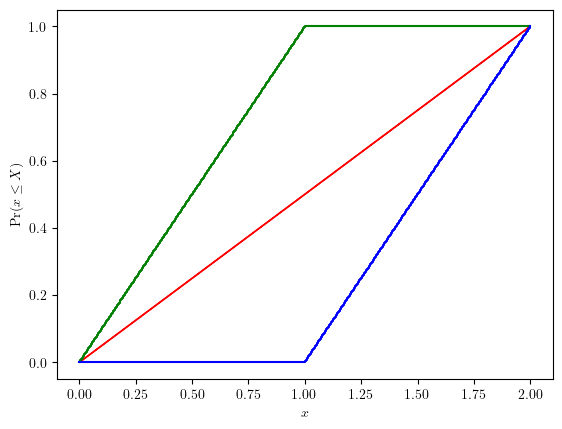

In [9]:
# the original plotting 
# un_obj._math_object.show()

# Leslie revised plotting
un_obj._math_object.quick_plot(style='band')

In [13]:
# # a deliberate wrong case

# un_obj = UN(name='elas_modulus', 
#             symbol='E', 
#             units='pa', 
#             essence='pbox',
#             pbox_parameters=[1,2])

### if specify a `pbox` with ancilllary information

In [14]:
un_obj = UN(
    name='Elas_modulus', 
    symbol='E', 
    units='GPa', 
    essence='distribution', 
    distribution_parameters=['gaussian', [(0,1),(1,2)]],
    measurand = "unobservable parameter",
    nature = "expert opinion",
    provenence = "analyst",
    justification = "reference",
)

In [15]:
un_obj

UncertainNumber(name='Elas_modulus', symbol='E', units='GPa', essence='distribution', distribution_parameters=['gaussian', [(0, 1), (1, 2)]], naked_value=np.float64(0.44166886889266493), measurand='unobservable parameter', nature='expert opinion', provenence='analyst', justification='reference')

In [ ]:
# un_obj.JSON_dump(filename='ancillary_UN.json')

In [ ]:
### json serializable

### from hedged specification

In [ ]:
un_obj = UncertainNumber.from_hedge(hedged_language='exactly 7')

In [ ]:
un_obj._math_object

In [ ]:
un_obj

# ~~create and serialise multiple UN objects into JSON~~

In [ ]:
from PyUncertainNumber.multiple_UN import make_many_intervals, Deck

In [ ]:
deck = Deck()

In [ ]:
# # show __repr__ which is long
# deck.JSON_dump(filename="./results/mulUN_data.json")